In [57]:
#Part1

In [76]:
#Imports
import pandas as pd
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
import math
import seaborn as sn

In [41]:
#compute manhattan distance
def manhattan(x1, y1, x2, y2):
    manhattan_distance = np.abs(x2 - x1) + np.abs(y2 - y1)
    return manhattan_distance

In [43]:
#compute supremum distance
def supremum(x1, y1, x2, y2):
    supremum_distance = np.max(np.abs(x2 - x1), np.abs(y2 - y1))
    return supremum_distance

In [3]:
#download csv
simple_data = pd.read_csv('simple_bin.csv')
simple_data_shape = simple_data.shape
print(simple_data_shape)

(4, 3)
  point  x  y
0    p1  0  2
1    p2  2  0
2    p3  3  1
3    p4  5  1


In [4]:
#clean
cleaned_simple_data = simple_data.drop(['point'], axis = 1)
cleaned_simple_data_shape = cleaned_simple_data.shape
print(cleaned_simple_data_shape)

(4, 2)


Original


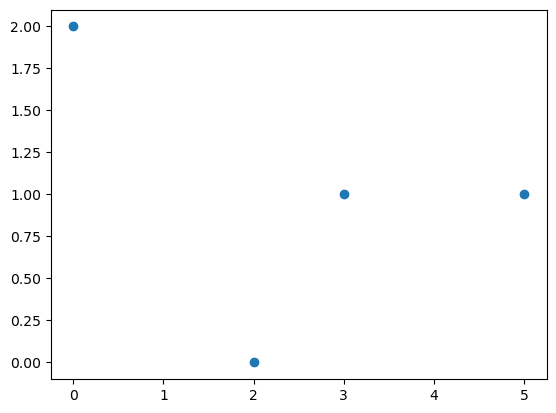

  point  x  y
0    p1  0  2
1    p2  2  0
2    p3  3  1
3    p4  5  1

Manhattan
     p1   p2   p3   p4
p1  0.0  4.0  4.0  6.0
p2  4.0  0.0  2.0  4.0
p3  4.0  2.0  0.0  2.0
p4  6.0  4.0  2.0  0.0

Euclidian
          p1        p2        p3        p4
p1  0.000000  2.828427  3.162278  5.099020
p2  2.828427  0.000000  1.414214  3.162278
p3  3.162278  1.414214  0.000000  2.000000
p4  5.099020  3.162278  2.000000  0.000000

Supremum
     p1   p2   p3   p4
p1  0.0  4.0  4.0  6.0
p2  4.0  0.0  2.0  4.0
p3  4.0  2.0  0.0  2.0
p4  6.0  4.0  2.0  0.0


In [44]:
#find distance
euc_distances = np.zeros((4,4))
man_distances = np.zeros((4,4))
sup_distances = np.zeros((4,4))

num_points = len(cleaned_simple_data)

for i in range(num_points):
    for j in range(i+1, num_points):
        x1, y1 = cleaned_simple_data.iloc[i]['x'], cleaned_simple_data.iloc[i]['y']
        x2, y2 = cleaned_simple_data.iloc[j]['x'], cleaned_simple_data.iloc[j]['y']
        
        #manhattan
        man_distance = manhattan(x1, y1, x2, y2)
        man_distances[i, j] = man_distance
        man_distances[j, i] = man_distance
        
        #euclidian
        euc_distance = math.dist([x1, y1], [x2, y2])
        euc_distances[i, j] = euc_distance
        euc_distances[j, i] = euc_distance
        
        #supremum
        sup_distance = manhattan(x1, y1, x2, y2)
        sup_distances[i, j] = sup_distance
        sup_distances[j, i] = sup_distance
        
#print original db
print('Original')
plt.scatter(simple_data.iloc[:, 1], simple_data.iloc[:,2])
plt.show()
print(simple_data)
        
#manhattan
man_dist_data = pd.DataFrame(man_distances)
man_dist_data.columns = ['p1', 'p2', 'p3', 'p4']
man_dist_data.index = ['p1', 'p2', 'p3', 'p4']
print()
print('Manhattan')
print(man_dist_data)

#euclidian
euc_dist_data = pd.DataFrame(euc_distances)
euc_dist_data.columns = ['p1', 'p2', 'p3', 'p4']
euc_dist_data.index = ['p1', 'p2', 'p3', 'p4']
print()
print('Euclidian')
print(euc_dist_data)

#supremum
sup_dist_data = pd.DataFrame(sup_distances)
sup_dist_data.columns = ['p1', 'p2', 'p3', 'p4']
sup_dist_data.index = ['p1', 'p2', 'p3', 'p4']
print()
print('Supremum')
print(sup_dist_data)

In [ ]:
#Part 2

In [48]:
#download csv
data = pd.read_csv('SCLC_study_output_filtered_2.csv')
data_shape = data.shape
print(data_shape)
print(data)

(40, 20)
         Unnamed: 0           295           464           961          1000  \
0      NSCLC_A549_1  1.246687e+06   59929.70461  205990.10240  141932.67280   
1     NSCLC_H1703_2  1.338013e+06   89261.66256  245504.46460  153877.95640   
2     NSCLC_H1703_1  1.040438e+06   96002.36973  321302.76350  184414.18630   
3      NSCLC_A549_2  1.371136e+06   81436.65785  299820.73530  261578.57320   
4     NSCLC_H1437_1  1.107106e+06   92368.82235  225084.58300  149658.91170   
5     NSCLC_H2228_1  1.174738e+06   79716.72953  156993.44400   90737.41356   
6     NSCLC_H2228_2  1.202537e+06   78543.10781  177756.90200   93190.85907   
7     NSCLC_H1437_2  1.227508e+06   85554.76639  176479.96710  133280.40000   
8     NSCLC_H3122_1  8.970122e+05   58148.61391   75601.49088   85941.99274   
9      NSCLC_H322_2  9.764488e+05   89009.23679  238764.68520  142421.06880   
10     NSCLC_H322_1  7.597031e+05   89690.57333  269159.80800  178466.89090   
11     NSCLC_H358_2  1.293611e+06   91824.7

In [50]:
cleaned_data = data.drop(['Unnamed: 0'], axis = 1)
cleaned_data_shape = cleaned_data.shape
print(cleaned_data_shape)

(40, 19)


In [93]:
def multi_euclidean(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def multi_manhattan(point1, point2):
    return np.sum(np.abs(point1 - point2))

def multi_supremum(point1, point2):
    return max(np.abs(point1 - point2))

In [94]:
multi_man_ditances = np.zeros((40,40))
multi_euc_ditances = np.zeros((40,40))
multi_sup_ditances = np.zeros((40,40))

num_points = len(cleaned_data)

for i in range(num_points):
    for j in range(i+1, num_points):
        point1 = cleaned_data.iloc[i, :]
        point2 = cleaned_data.iloc[j, :]
        #manhattan
        multi_man_distance = multi_manhattan(point1, point2)
        multi_man_ditances[i, j] = multi_man_distance
        multi_man_ditances[j, i] = multi_man_distance
        
        #euclidian
        multi_euc_distance = multi_euclidean(point1, point2)
        multi_euc_ditances[i, j] = multi_euc_distance
        multi_euc_ditances[j, i] = multi_euc_distance
        
        #supremum
        multi_sup_distance = multi_supremum(point1, point2)
        multi_sup_ditances[i, j] = multi_sup_distance
        multi_sup_ditances[j, i] = multi_sup_distance
        

Manhattan
Supremum


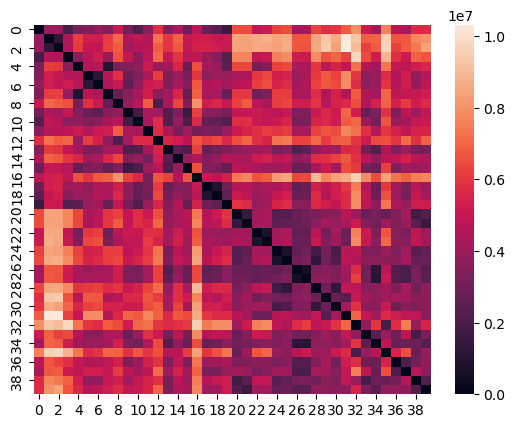

In [92]:
#heatmap
print('Manhattan')
hm = sn.heatmap(data = multi_man_ditances)

Euclidian


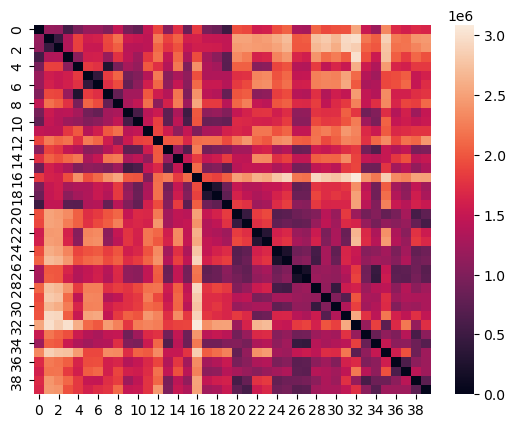

In [91]:
print('Euclidian')
hm = sn.heatmap(data = multi_euc_ditances)

Supremum


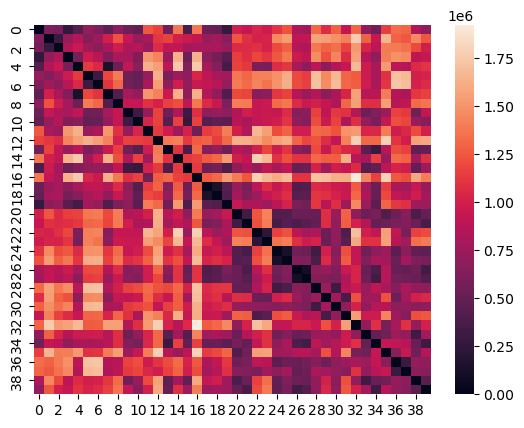

In [95]:
print('Supremum')
hm = sn.heatmap(data = multi_sup_ditances)

In [ ]:
#Part 3

In [59]:
#import csv
bin_data = pd.read_csv('binary_vectors.csv')
bin_data_shape = bin_data.shape
print(bin_data_shape)
print(bin_data)

(200, 3)
     Unnamed: 0  v1  v2
0             0   0   0
1             1   0   0
2             2   0   0
3             3   0   0
4             4   1   1
..          ...  ..  ..
195         195   0   0
196         196   0   0
197         197   0   0
198         198   0   1
199         199   0   0

[200 rows x 3 columns]


In [63]:
#clean db
cleaned_bin_data = bin_data.drop(['Unnamed: 0'], axis = 1)
cleaned_bin_data_shape = cleaned_bin_data.shape
print(cleaned_bin_data_shape)
print(cleaned_bin_data)

(200, 2)
     v1  v2
0     0   0
1     0   0
2     0   0
3     0   0
4     1   1
..   ..  ..
195   0   0
196   0   0
197   0   0
198   0   1
199   0   0

[200 rows x 2 columns]


In [72]:
#vectors
vector1 = cleaned_bin_data.iloc[:, 0]
vector2 = cleaned_bin_data.iloc[:, 1]

In [73]:
#simple matching coefficient
matching = np.sum(vector1 == vector2)
total = len(vector1)
print(matching / total)

0.61


In [79]:
#jaccard coefficient
intersection = np.sum(np.minimum(vector1, vector2))
union = np.sum(np.maximum(vector1, vector2))
print(intersection / union)

0.14285714285714285


In [78]:
#cosine similarity
cosine = np.dot(vector1, vector2)/(norm(vector1)*norm(vector2))
print(cosine)

0.25168100511526903
